In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import models.segmentation_models_qubvel as sm
from utils.augmentation import get_preprocessing
from utils.smooth_tiled_predictions import predict_img_with_smooth_windowing
from utils.predict import predict_image

Segmentation Models: using `keras` framework.


# Qualitative Evaluation
Code to plot qualitative results. This notebook contains three different prediction scenarios:
- Whole Image Prediction: to predict the whole image using a model trained on the original image size.
- Patch Prediction: to predict smaller patches of an image using a model trained on smaller patches, stitches patch predictions to achieve original image size.
- Smooth Patch Prediction: to predict smaller patches of an image using a model trained on smaller patches, smoothly blends predictions to achieve original image size.

The ```weights``` folder of this repository includes three different weight sets for testing:
- ```flight9.h5```: from training on images from flight 9 only (8 training images).
- ```flight9_flight16.h5```: from training on images from flight 9 and flight 16 (16 training images - 7 from flight 9 and 9 from flight 16).
- ```flight9_patch32.h5```: from training on images from flight 9 with patch size 32 (1800 training images).

In [2]:
# replace data path to images that you want to predict
pred_dir = 'E:/polar/code/data/evaluation/qualitative/flight9/'

# specify a path to folder for saving predicted images
save_path = 'E:/polar/code/ponds_extended_data/evaluation/qualitative/test03/pred_9/testtest'

# replace if desired
weights_whole = 'weights/flight9.h5'

weights32 = 'weights/flight9_patch32.h5'

### Whole Image Prediction

1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0


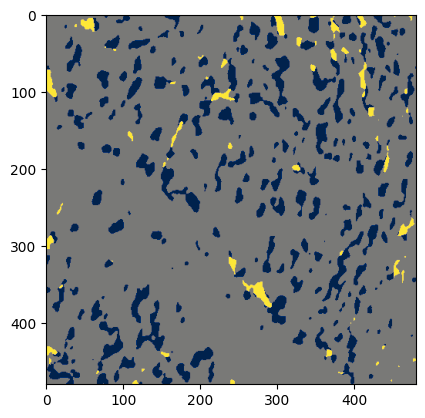

In [3]:
for idx, file in enumerate(os.listdir(pred_dir)):
    img = cv2.imread(os.path.join(pred_dir, file), 0)
    predict_image(img, 480, weights_whole, backbone='resnet34', train_transfer='imagenet', save_path=os.path.join(save_path, '{}.png'.format(idx)))

### Patch Prediction

1/1 [==============================] - 2s 2s/step
Finished processing patch number  1  at position  0 0
1/1 [==============================] - 0s 71ms/step
Finished processing patch number  2  at position  0 32
1/1 [==============================] - 0s 111ms/step
Finished processing patch number  3  at position  0 64
1/1 [==============================] - 0s 61ms/step
Finished processing patch number  4  at position  0 96
1/1 [==============================] - 0s 67ms/step
Finished processing patch number  5  at position  0 128
1/1 [==============================] - 0s 65ms/step
Finished processing patch number  6  at position  0 160
1/1 [==============================] - 0s 50ms/step
Finished processing patch number  7  at position  0 192
1/1 [==============================] - 0s 72ms/step
Finished processing patch number  8  at position  0 224
1/1 [==============================] - 0s 92ms/step
Finished processing patch number  9  at position  0 256
1/1 [=============================

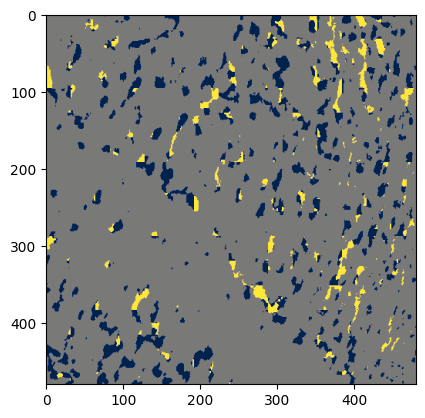

In [4]:
for idx, file in enumerate(os.listdir(pred_dir)):
    img = cv2.imread(os.path.join(pred_dir, file), 0)
    predict_image(img, 32, weights32, backbone='resnet34', train_transfer='imagenet', save_path=os.path.join(save_path, '{}_32.png'.format(idx)))

### Smooth Patch Prediction

(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 24s 182ms/step


 12%|█▎        | 1/8 [00:25<02:57, 25.34s/it]

125/125 [==============================] - 22s 174ms/step


 25%|██▌       | 2/8 [00:48<02:25, 24.17s/it]

125/125 [==============================] - 22s 180ms/step


 38%|███▊      | 3/8 [01:12<02:00, 24.16s/it]

125/125 [==============================] - 22s 177ms/step


 50%|█████     | 4/8 [01:36<01:35, 24.00s/it]

125/125 [==============================] - 23s 185ms/step


 62%|██████▎   | 5/8 [02:01<01:12, 24.19s/it]

125/125 [==============================] - 30s 244ms/step


 75%|███████▌  | 6/8 [02:33<00:54, 27.00s/it]

125/125 [==============================] - 28s 227ms/step


 88%|████████▊ | 7/8 [03:05<00:28, 28.64s/it]

125/125 [==============================] - 30s 238ms/step


100%|██████████| 8/8 [03:37<00:00, 27.24s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 25s 191ms/step


 12%|█▎        | 1/8 [00:26<03:06, 26.66s/it]

125/125 [==============================] - 25s 201ms/step


 25%|██▌       | 2/8 [00:53<02:40, 26.69s/it]

125/125 [==============================] - 30s 243ms/step


 38%|███▊      | 3/8 [01:25<02:26, 29.30s/it]

125/125 [==============================] - 27s 220ms/step


 50%|█████     | 4/8 [01:54<01:56, 29.24s/it]

125/125 [==============================] - 30s 241ms/step


 62%|██████▎   | 5/8 [02:27<01:31, 30.47s/it]

125/125 [==============================] - 32s 256ms/step


 75%|███████▌  | 6/8 [03:02<01:04, 32.08s/it]

125/125 [==============================] - 26s 208ms/step


 88%|████████▊ | 7/8 [03:45<00:35, 35.62s/it]

125/125 [==============================] - 23s 187ms/step


100%|██████████| 8/8 [04:10<00:00, 31.31s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 24s 185ms/step


 12%|█▎        | 1/8 [00:25<02:58, 25.57s/it]

125/125 [==============================] - 23s 185ms/step


 25%|██▌       | 2/8 [00:50<02:30, 25.00s/it]

125/125 [==============================] - 23s 183ms/step


 38%|███▊      | 3/8 [01:32<02:44, 32.94s/it]

125/125 [==============================] - 22s 174ms/step


 50%|█████     | 4/8 [01:55<01:56, 29.09s/it]

125/125 [==============================] - 22s 175ms/step


 62%|██████▎   | 5/8 [02:19<01:21, 27.06s/it]

125/125 [==============================] - 24s 193ms/step


 75%|███████▌  | 6/8 [02:45<00:53, 26.69s/it]

125/125 [==============================] - 26s 204ms/step


 88%|████████▊ | 7/8 [03:12<00:26, 26.93s/it]

125/125 [==============================] - 25s 199ms/step


100%|██████████| 8/8 [03:38<00:00, 27.37s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 28s 215ms/step


 12%|█▎        | 1/8 [00:30<03:32, 30.36s/it]

125/125 [==============================] - 31s 246ms/step


 25%|██▌       | 2/8 [01:03<03:10, 31.75s/it]

125/125 [==============================] - 26s 210ms/step


 38%|███▊      | 3/8 [01:30<02:29, 29.98s/it]

125/125 [==============================] - 38s 301ms/step


 50%|█████     | 4/8 [02:10<02:14, 33.70s/it]

125/125 [==============================] - 26s 209ms/step


 62%|██████▎   | 5/8 [02:38<01:34, 31.65s/it]

125/125 [==============================] - 33s 263ms/step


 75%|███████▌  | 6/8 [03:13<01:05, 32.89s/it]

125/125 [==============================] - 28s 224ms/step


 88%|████████▊ | 7/8 [03:43<00:32, 32.05s/it]

125/125 [==============================] - 30s 241ms/step


100%|██████████| 8/8 [04:16<00:00, 32.04s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 31s 233ms/step


 12%|█▎        | 1/8 [00:33<03:51, 33.02s/it]

125/125 [==============================] - 31s 247ms/step


 25%|██▌       | 2/8 [01:05<03:17, 32.85s/it]

125/125 [==============================] - 32s 255ms/step


 38%|███▊      | 3/8 [01:40<02:47, 33.55s/it]

125/125 [==============================] - 29s 229ms/step


 50%|█████     | 4/8 [02:10<02:08, 32.21s/it]

125/125 [==============================] - 25s 198ms/step


 62%|██████▎   | 5/8 [02:36<01:30, 30.08s/it]

125/125 [==============================] - 25s 199ms/step


 75%|███████▌  | 6/8 [03:03<00:57, 28.88s/it]

125/125 [==============================] - 31s 251ms/step


 88%|████████▊ | 7/8 [03:45<00:33, 33.35s/it]

125/125 [==============================] - 25s 201ms/step


100%|██████████| 8/8 [04:12<00:00, 31.54s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 26s 202ms/step


 12%|█▎        | 1/8 [00:27<03:15, 28.00s/it]

125/125 [==============================] - 32s 253ms/step


 25%|██▌       | 2/8 [01:01<03:06, 31.04s/it]

125/125 [==============================] - 37s 295ms/step


 38%|███▊      | 3/8 [01:40<02:53, 34.64s/it]

125/125 [==============================] - 26s 210ms/step


 50%|█████     | 4/8 [02:07<02:07, 31.97s/it]

125/125 [==============================] - 25s 199ms/step


 62%|██████▎   | 5/8 [02:34<01:29, 29.99s/it]

125/125 [==============================] - 24s 196ms/step


 75%|███████▌  | 6/8 [03:00<00:57, 28.66s/it]

125/125 [==============================] - 25s 198ms/step


 88%|████████▊ | 7/8 [03:26<00:27, 27.87s/it]

125/125 [==============================] - 25s 202ms/step


100%|██████████| 8/8 [03:53<00:00, 29.22s/it]


(480, 480, 3)


  0%|          | 0/8 [00:00<?, ?it/s]

125/125 [==============================] - 33s 253ms/step


 12%|█▎        | 1/8 [00:34<04:01, 34.51s/it]

125/125 [==============================] - 31s 250ms/step


 25%|██▌       | 2/8 [01:07<03:22, 33.71s/it]

125/125 [==============================] - 32s 256ms/step


 38%|███▊      | 3/8 [01:42<02:50, 34.01s/it]

125/125 [==============================] - 27s 217ms/step


 50%|█████     | 4/8 [02:11<02:08, 32.04s/it]

125/125 [==============================] - 25s 199ms/step


 62%|██████▎   | 5/8 [02:37<01:30, 30.16s/it]

125/125 [==============================] - 30s 241ms/step


 75%|███████▌  | 6/8 [03:10<01:01, 30.88s/it]

125/125 [==============================] - 40s 320ms/step


 88%|████████▊ | 7/8 [03:54<00:35, 35.13s/it]

125/125 [==============================] - 41s 332ms/step


100%|██████████| 8/8 [04:38<00:00, 34.79s/it]


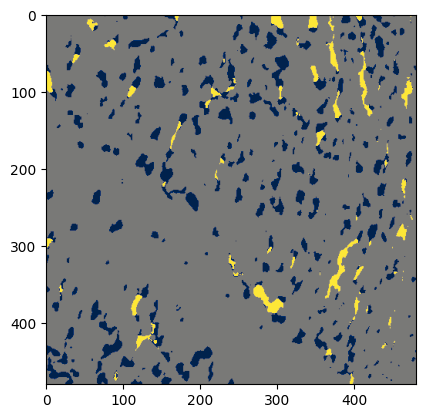

In [5]:
for idx, file in enumerate(os.listdir(pred_dir)):
    img = cv2.imread(os.path.join(pred_dir, file), 0)
    predict_image(img, 32, weights32, smooth=True, backbone='resnet34', train_transfer='imagenet', save_path=os.path.join(save_path, '{}_32_smooth.png'.format(idx)))